In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
messages = pd.read_json('google.json')
messages

,Title,Date,Contributor,Link
0,Google AI Blog: Self-Supervised Reversibility-...,2021-11-03,"Posted by Johan Ferret, Student Researcher, Go...",https://ai.googleblog.com/2021/11/self-supervi...
1,Google AI Blog: How Underspecification Present...,2021-10-18,"Posted by Alex D’Amour and Katherine Heller, R...",https://ai.googleblog.com/2021/10/how-underspe...
2,Google AI Blog: Predicting Spreadsheet Formula...,2021-10-20,"Posted by Rishabh Singh, Research Scientist an...",https://ai.googleblog.com/2021/10/predicting-s...
3,Google AI Blog: Practical Differentially Priva...,2021-10-21,"Posted by Alisa Chang, Software Engineer, Goog...",https://ai.googleblog.com/2021/10/practical-di...
4,Google AI Blog: Deciding Which Tasks Should Tr...,2021-10-25,"Posted by Christopher Fifty, Research Engineer...",https://ai.googleblog.com/2021/10/deciding-whi...
...,...,...,...,...
992,Google AI Blog: First Robots,2006-03-22,"Posted by Sumit Agarwal, Maryam Kamvar, & Mich...",https://ai.googleblog.com/2006/03/first-robots...
993,Google AI Blog: See you at CHI,2006-04-23,"Posted by Rick Boardman, User Experience Resea...",https://ai.googleblog.com/2006/04/see-you-at-c...
994,Google AI Blog: Our conference on automated te...,2006-04-27,"Posted by Allen Hutchison, Engineering Manager",https://ai.googleblog.com/2006/04/our-conferen...
995,Google AI Blog: Statistical machine translatio...,2006-04-28,"Posted by Franz Och, Research Scientist",https://ai.googleblog.com/2006/04/statistical-...


In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [7]:
message_text = str(messages.Title.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

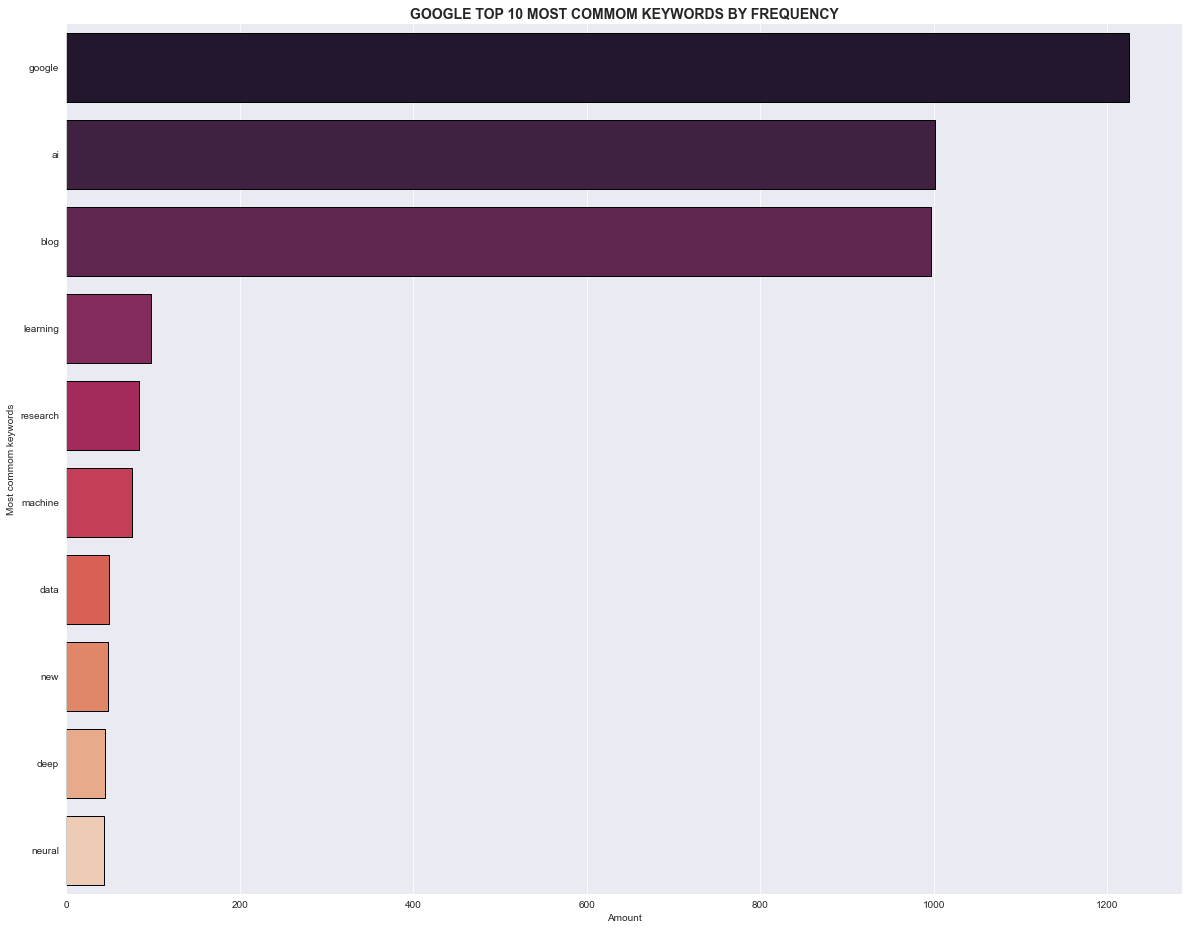

In [8]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('GOOGLE TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('google_keywords.png')

In [9]:
doc = list(nlp(message_text).noun_chunks)

In [12]:
import sys

orig_stdout = sys.stdout
f = open(
    'google.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Google' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [14]:
df = pd.read_table(
    'google.txt', 
    header=None,
    encoding= 'cp1252'
)
df.rename(
    columns={
        0: 'Google'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.Google.value_counts()
).rename(
    columns={'Google': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()

,Frequency
Term,
Google AI Blog,599
'Google AI Blog,134
'Google AI Blog,36
Google,35
Machine Learning',7


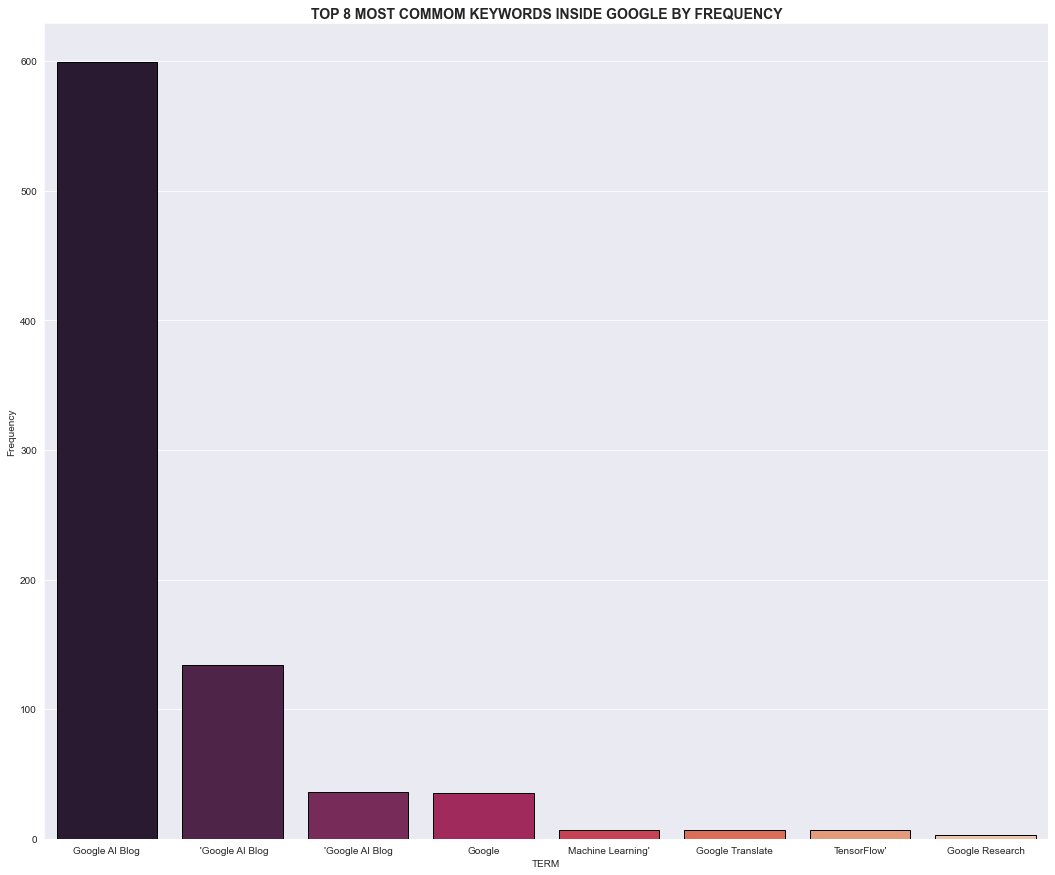

In [16]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:8], 
    x=dff.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE GOOGLE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)

In [17]:
orig_stdout = sys.stdout
f = open(
    'ai.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'AI' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [19]:
df2 = pd.read_table(
    'ai.txt', 
    header=None
)
df2.rename(
    columns={
        0: 'AI'
    },
    inplace=True, 
    errors='raise'
)
dff2 = pd.DataFrame(
    data=df2.AI.value_counts()
).rename(
    columns={'AI': 'Frequency'}
).rename_axis(
    'Term'
)
dff2.head()

,Frequency
Term,
Google AI Blog,599
'Google AI Blog,134
'Google AI Blog,36
Machine Learning',7
TensorFlow',7


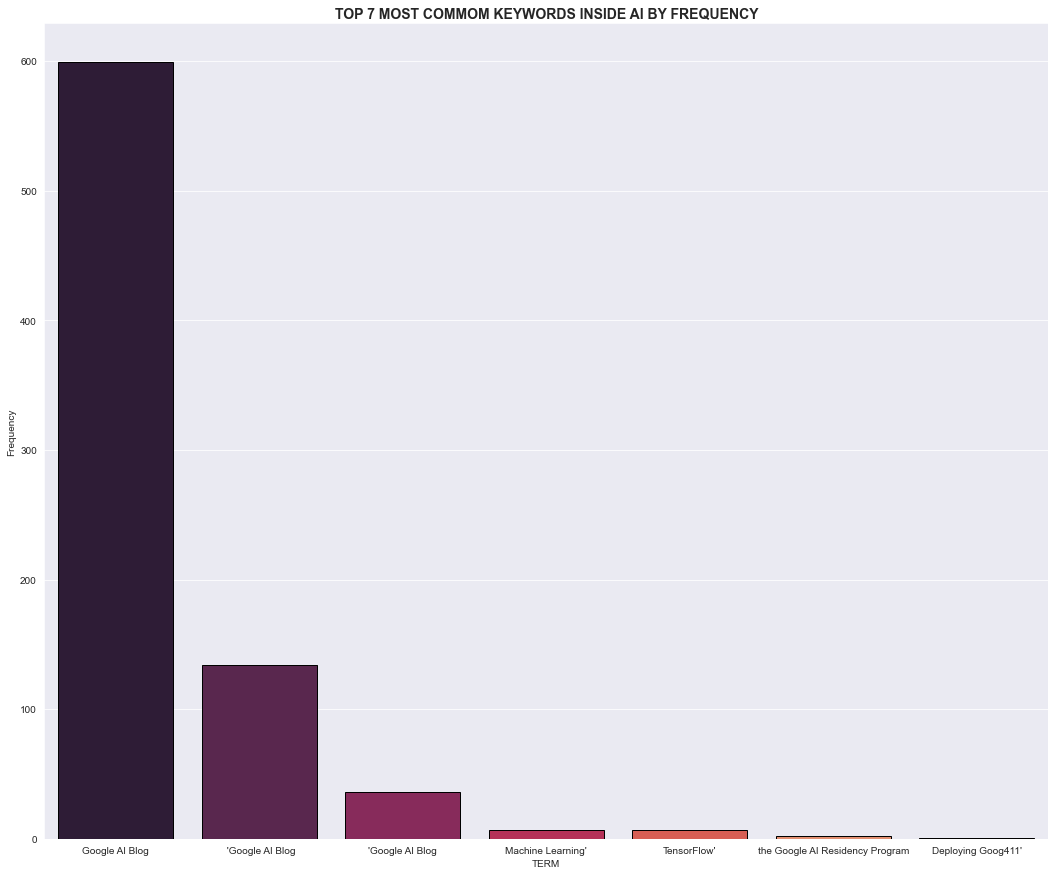

In [23]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff2[:7], 
    x=dff2.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE AI BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'second_most_commom_keyword.png'
)

In [24]:
orig_stdout = sys.stdout
f = open(
    'blog.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Blog' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [25]:
df3 = pd.read_table(
    'blog.txt', 
    header=None
)
df3.rename(
    columns={
        0: 'Blog'
    },
    inplace=True, 
    errors='raise'
)
dff3 = pd.DataFrame(
    data=df3.Blog.value_counts()
).rename(
    columns={'Blog': 'Frequency'}
).rename_axis(
    'Term'
)
dff3.head()

,Frequency
Term,
Google AI Blog,599
'Google AI Blog,134
'Google AI Blog,36
TensorFlow',7
Machine Learning',7


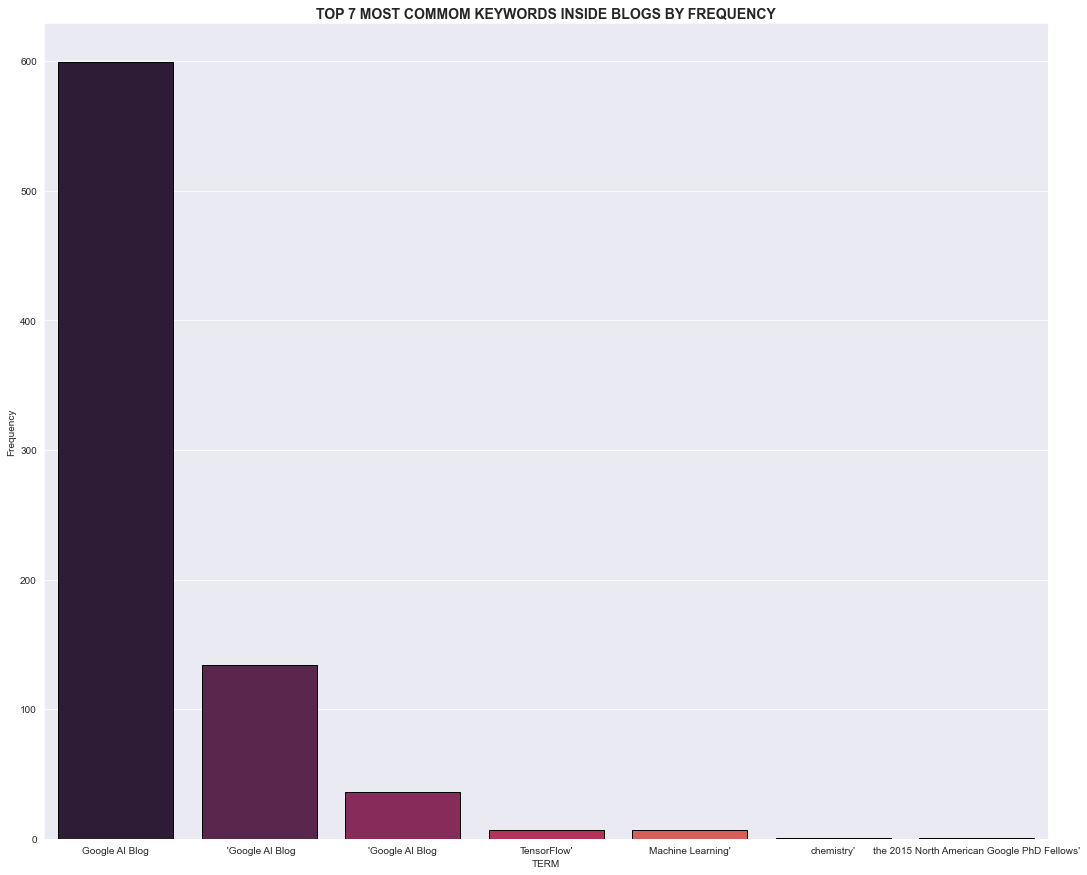

In [28]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff3[:7], 
    x=dff3.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE BLOGS BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'third_most_commom_keyword.png'
)

In [29]:
orig_stdout = sys.stdout
f = open(
    'learning.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Learning' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [30]:
df4 = pd.read_table(
    'learning.txt', 
    header=None
)
df4.rename(
    columns={
        0: 'Learning'
    },
    inplace=True, 
    errors='raise'
)
dff4 = pd.DataFrame(
    data=df4.Learning.value_counts()
).rename(
    columns={'Learning': 'Frequency'}
).rename_axis(
    'Term'
)
dff4.head()

,Frequency
Term,
Machine Learning,25
Deep Learning,17
'Google AI Blog,15
Machine Learning',7
Reinforcement Learning,6


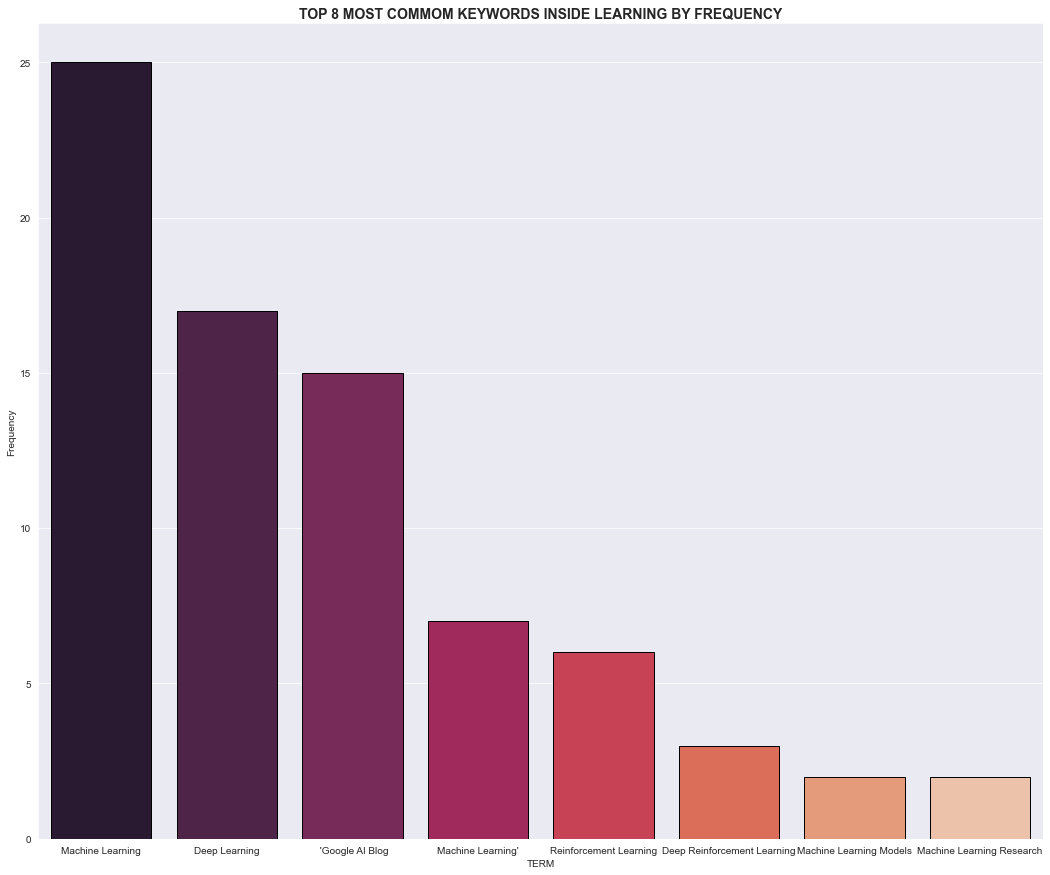

In [32]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff4[:8], 
    x=dff4.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE LEARNING BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fourth_most_commom_keyword.png'
)

In [33]:
orig_stdout = sys.stdout
f = open(
    'research.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Research' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [36]:
df5 = pd.read_table(
    'research.txt', 
    header=None,
    encoding= 'cp1252'
)
df5.rename(
    columns={
        0: 'Research'
    },
    inplace=True, 
    errors='raise'
)
dff5 = pd.DataFrame(
    data=df5.Research.value_counts()
).rename(
    columns={'Research': 'Frequency'}
).rename_axis(
    'Term'
)
dff5.head()

,Frequency
Term,
Research,7
Google Research Awards,7
Google Research,3
Google Faculty Research Awards,3
Machine Learning Research,2


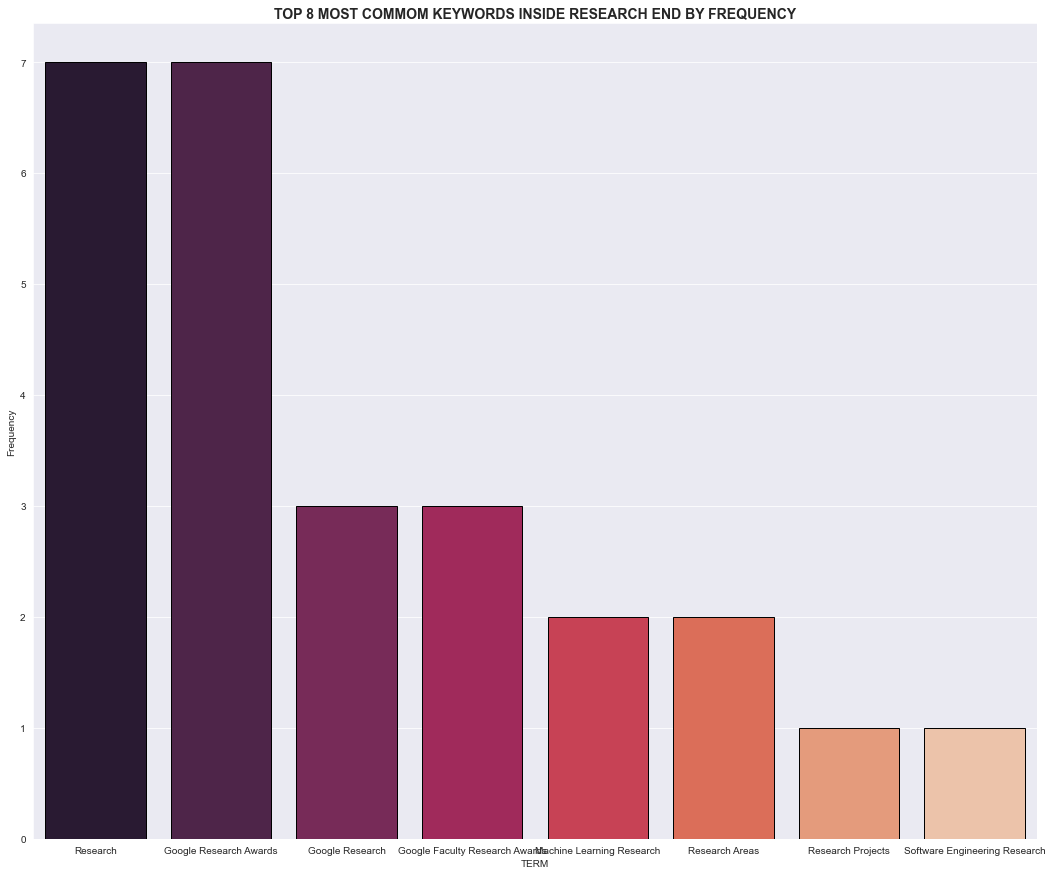

In [37]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff5[:8], 
    x=dff5.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE RESEARCH END BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fifth_most_commom_keyword.png'
)

In [38]:
orig_stdout = sys.stdout
f = open(
    'machine.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Machine' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [40]:
df6 = pd.read_table(
    'machine.txt', 
    header=None,
    encoding= 'cp1252'
)
df6.rename(
    columns={
        0: 'Machine'
    },
    inplace=True, 
    errors='raise'
)
dff6 = pd.DataFrame(
    data=df6.Machine.value_counts()
).rename(
    columns={'Machine': 'Frequency'}
).rename_axis(
    'Term'
)
dff6.head()

,Frequency
Term,
Machine Learning,25
'Google AI Blog,9
Machine Learning',7
Machine Learning Research,2
Quantum Machine Learning,2


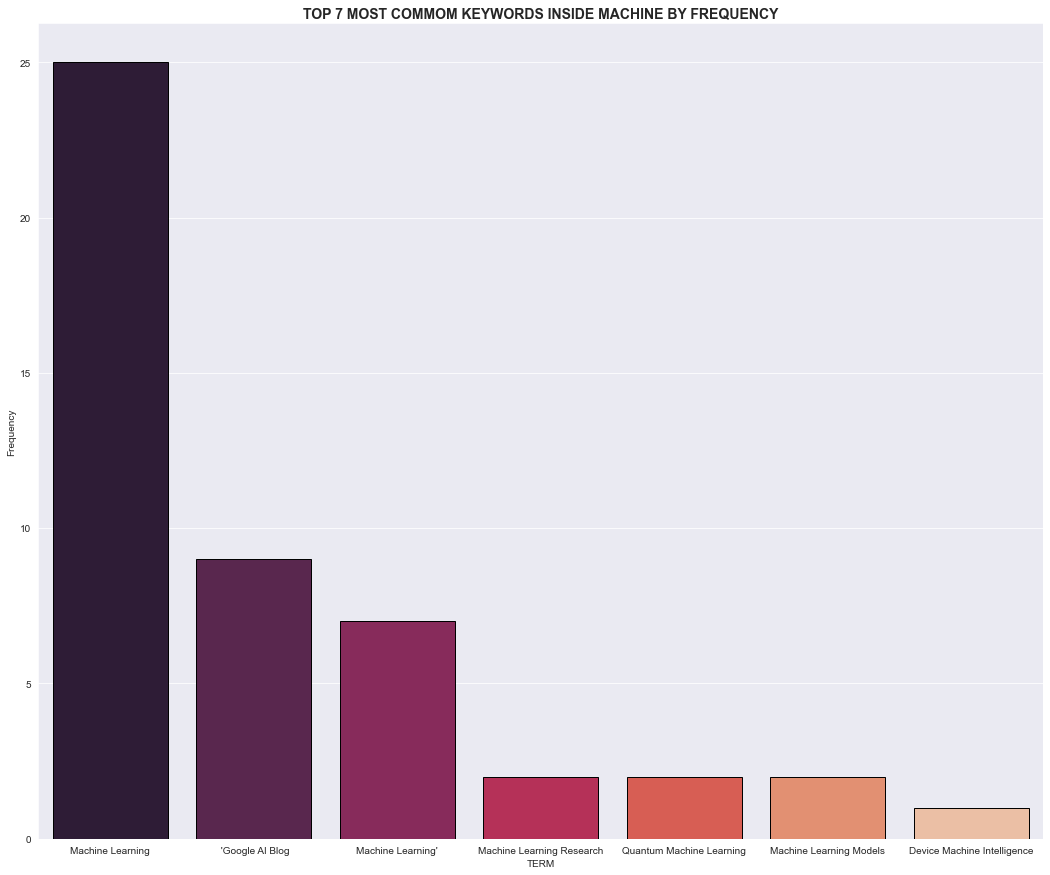

In [45]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff6[:7], 
    x=dff6.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE MACHINE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'sixth_most_commom_keyword.png'
)

In [46]:
orig_stdout = sys.stdout
f = open(
    'data.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Data' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [47]:
df7 = pd.read_table(
    'data.txt', 
    header=None
)
df7.rename(
    columns={
        0: 'Data'
    },
    inplace=True, 
    errors='raise'
)
dff7 = pd.DataFrame(
    data=df7.Data.value_counts()
).rename(
    columns={'Data': 'Frequency'}
).rename_axis(
    'Term'
)
dff7.head()

,Frequency
Term,
Data,7
A Dataset,5
A New Dataset,2
Two New Datasets,2
Labeled Data,1


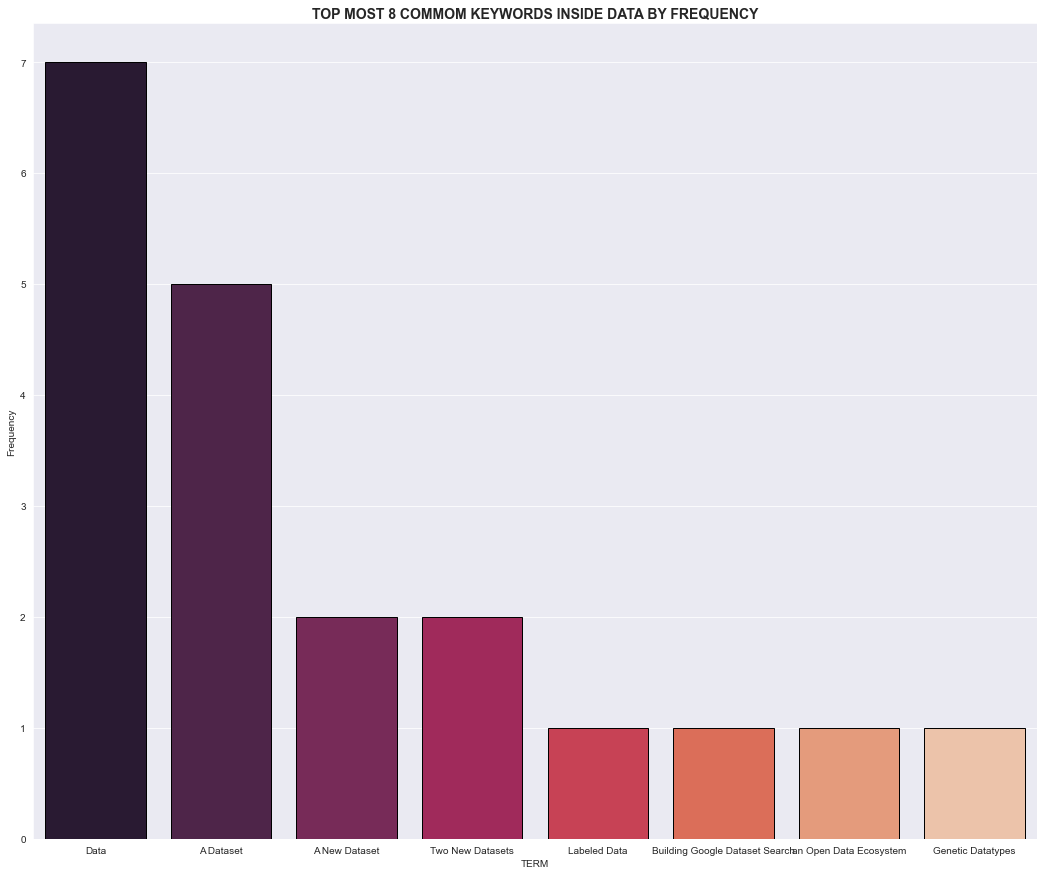

In [50]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff7[:8], 
    x=dff7.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST 8 COMMOM KEYWORDS INSIDE DATA BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'seventh_most_commom_keyword.png'
)

In [51]:

orig_stdout = sys.stdout
f = open(
    'new.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'New' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [53]:
df8 = pd.read_table(
    'new.txt', 
    header=None,
    encoding= 'cp1252'
)
df8.rename(
    columns={
        0: 'New'
    },
    inplace=True, 
    errors='raise'
)
dff8 = pd.DataFrame(
    data=df8.New.value_counts()
).rename(
    columns={'New': 'Frequency'}
).rename_axis(
    'Term'
)
dff8.head()

,Frequency
Term,
A New Approach,2
A New Dataset,2
Two New Datasets,2
New York,1
A New Way,1


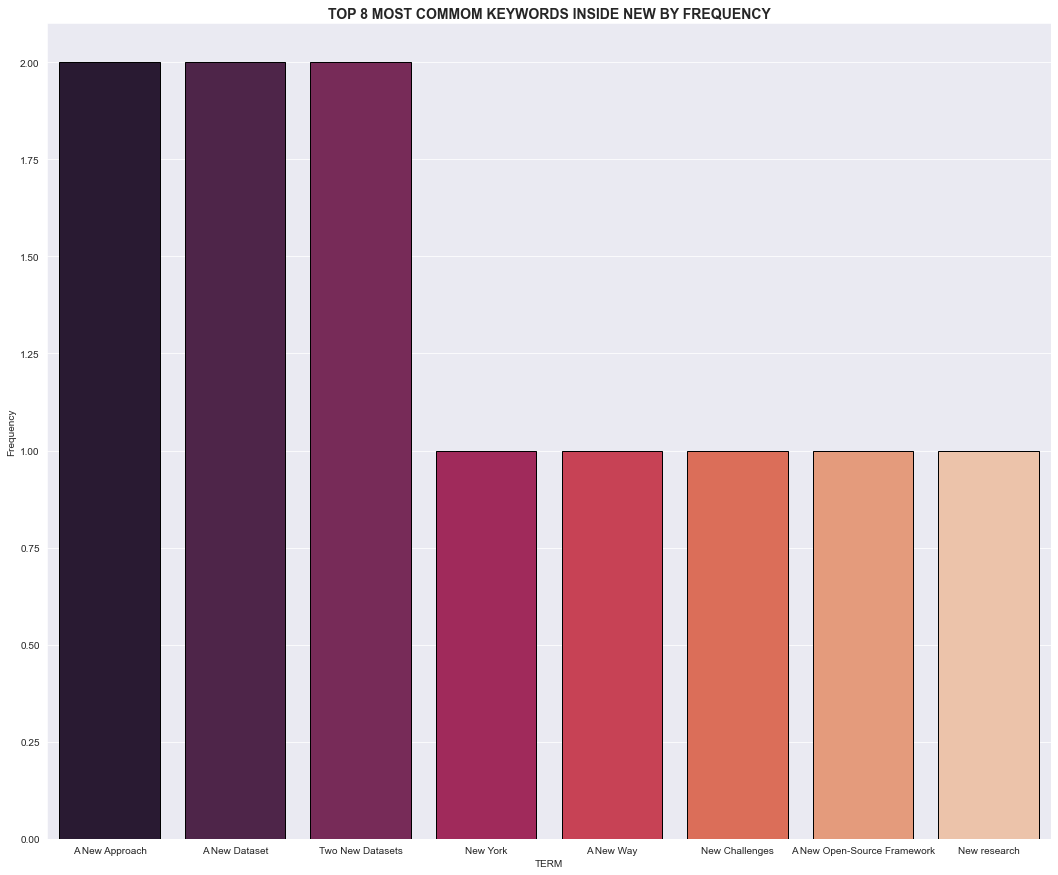

In [55]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff8[:8], 
    x=dff8.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE NEW BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'eighth_most_commom_keyword.png'
)

In [56]:
orig_stdout = sys.stdout
f = open(
    'deep.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Deep' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [57]:
df9 = pd.read_table(
    'deep.txt', 
    header=None
)
df9.rename(
    columns={
        0: 'Deep'
    },
    inplace=True, 
    errors='raise'
)
dff9 = pd.DataFrame(
    data=df9.Deep.value_counts()
).rename(
    columns={'Deep': 'Frequency'}
).rename_axis(
    'Term'
)
dff9.head()

,Frequency
Term,
Deep Learning,17
'Google AI Blog,4
Deep Neural Networks,4
Deep Reinforcement Learning,3
Scalable Deep Reinforcement Learning,1


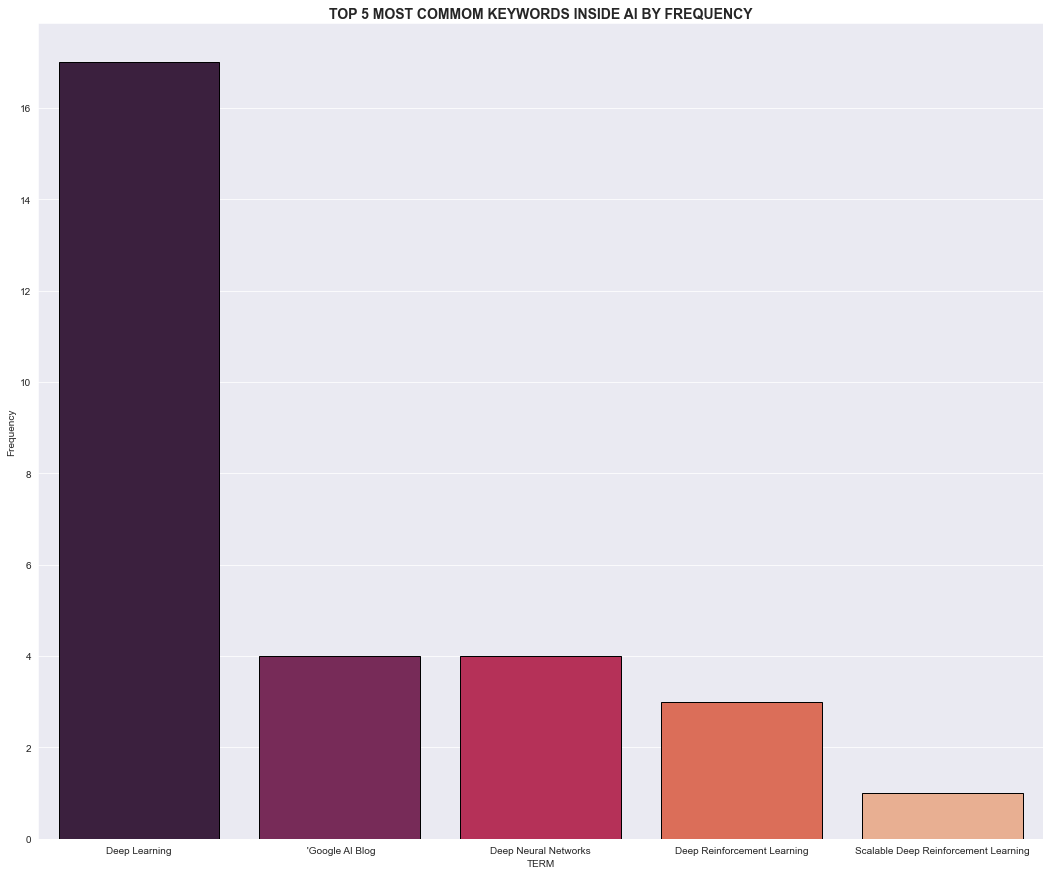

In [58]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff9[:5], 
    x=dff9.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE AI BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'nineth_most_commom_keyword.png'
)

In [59]:
orig_stdout = sys.stdout
f = open(
    'neural.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Neural' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [62]:
df10 = pd.read_table(
    'neural.txt', 
    header=None,
    encoding= 'cp1252'
)
df10.rename(
    columns={
        0: 'Neural'
    },
    inplace=True, 
    errors='raise'
)
dff10 = pd.DataFrame(
    data=df10.Neural.value_counts()
).rename(
    columns={'Neural': 'Frequency'}
).rename_axis(
    'Term'
)
dff10.head()

,Frequency
Term,
Neural Networks,8
Deep Neural Networks,4
Large-scale Neural Network Models,1
Google’s Multilingual Neural Machine Translation System,1
Neural Network-Generated Illustrations,1


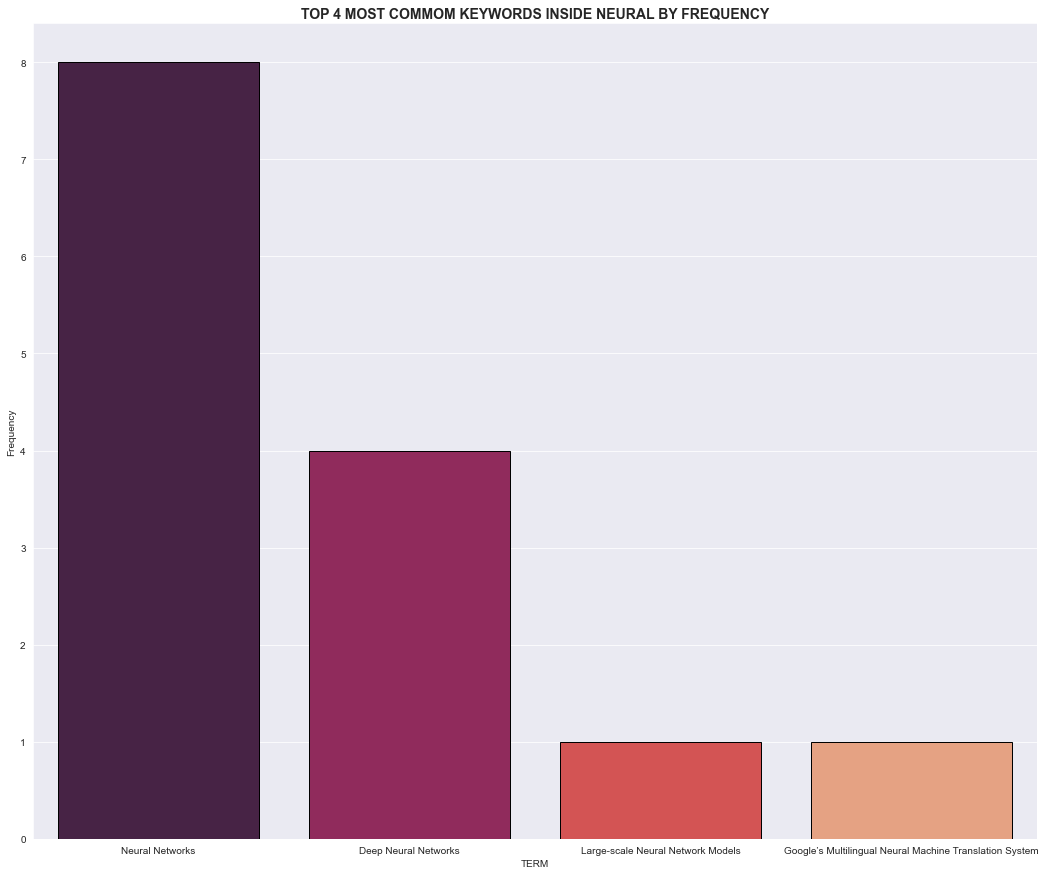

In [65]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff10[:4], 
    x=dff10.index[:4], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 4 MOST COMMOM KEYWORDS INSIDE NEURAL BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'tenth_most_commom_keyword.png'
)